In [441]:
from utils import load_imagenet_model, imagenet_datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
import numpy as np
from models import GaussianNoise
import torchvision
import torch

imagenet_path = "/tmp/imagenet/"
model_str = "noise000"
checkpoint_path = "/mnt/ceph/users/neurostatslab/imagenet_noise_models/"+model_str

_, dataset_test = imagenet_datasets(imagenet_path)
model = load_imagenet_model(checkpoint_path)
model.backbone.noise1 = GaussianNoise(0.27)
model.backbone.noise2 = GaussianNoise(0.27)
model.backbone.noise3 = GaussianNoise(0.27)
model.backbone.noise4 = GaussianNoise(0.27)
model.backbone.noise5 = GaussianNoise(0.27)
model.backbone.noise6 = GaussianNoise(0.27)
model.backbone.noise7 = GaussianNoise(0.27)
model.hparams

"layer_dim":    96
"lr":           0.06
"max_epochs":   100
"momentum":     0.9
"noise_std":    0.0
"weight_decay": 0.0005

In [442]:
cropped_imgs = []
activations = []
activations_test = []
crop_size = 32
step_size = 5
n_crops=12
n_draws=100
model.eval()
with torch.no_grad():
    for i in range(0,n_crops*step_size,step_size):
        ci = img[:,:crop_size,i:i+crop_size]
        cropped_imgs.append(ci)
        ci = ci.to(model.device)
        for i in range(n_draws):
            activations.append(model.backbone(ci).squeeze())
            activations_test.append(model.backbone(ci).squeeze())
# cropped_imgs = torch.stack(cropped_imgs)
activations = torch.stack(activations)
activations_test = torch.stack(activations_test)

/tmp/ipykernel_2873023/3763022278.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])


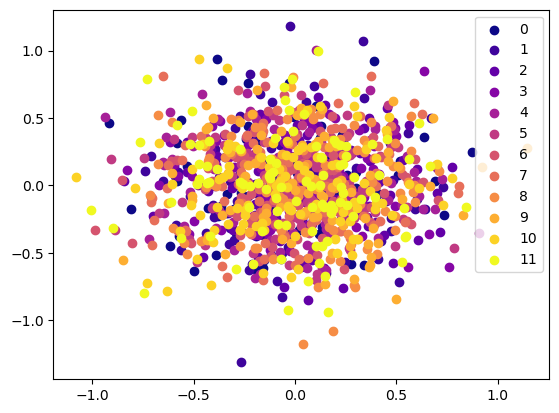

In [443]:
pcs = PCA(n_components=2).fit(activations.cpu())
proj = pcs.transform(activations.cpu())
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0,1,n_crops))
for n,i in enumerate(range(0,n_draws*n_crops,n_draws)):
    plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])
    plt.legend()

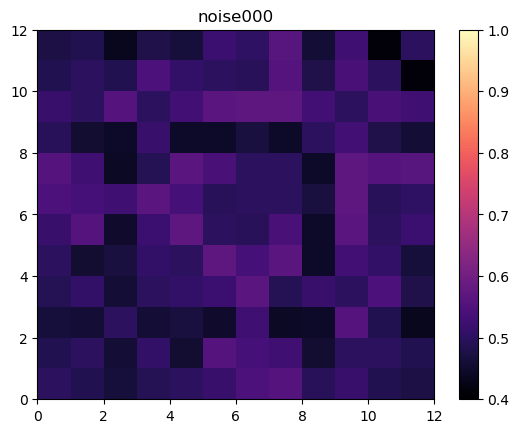

In [444]:
classification_score = np.zeros((n_crops, n_crops))
for n1,i1 in enumerate(range(0,n_draws*n_crops,n_draws)):
    for n2,i2 in enumerate(range(0,n_draws*n_crops,n_draws)):
        X = np.vstack((activations[i1:i1+n_draws].cpu(),activations[i2:i2+n_draws].cpu()))
        X_test = np.vstack((activations_test[i1:i1+n_draws].cpu(),activations_test[i2:i2+n_draws].cpu()))
        y = np.hstack((np.ones(100), -1*np.ones(100)))
        svm = LinearSVC(random_state=0).fit(X, y)
        classification_score[n1,n2] = svm.score(X_test,y)

plt.pcolormesh(classification_score, cmap='magma', vmin=0.4, vmax=1)
plt.title(model_str)
plt.colorbar()

/tmp/ipykernel_2873023/3763022278.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])


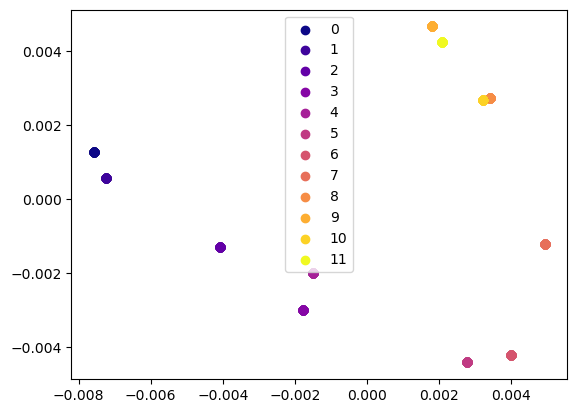

In [326]:
pcs = PCA(n_components=2).fit(activations.cpu())
proj = pcs.transform(activations.cpu())
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0,1,n_crops))
for n,i in enumerate(range(0,n_draws*n_crops,n_draws)):
    plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])
    plt.legend()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..2.465708].


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

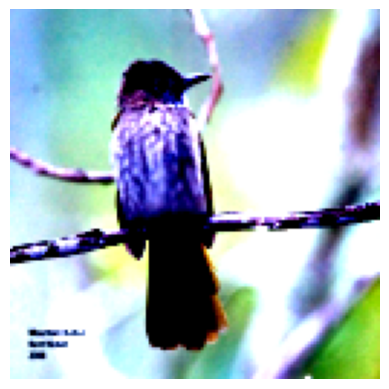

In [211]:
img = dataset_test[106][0]
plt.imshow(img.permute(1,2,0))
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..1.9951199].


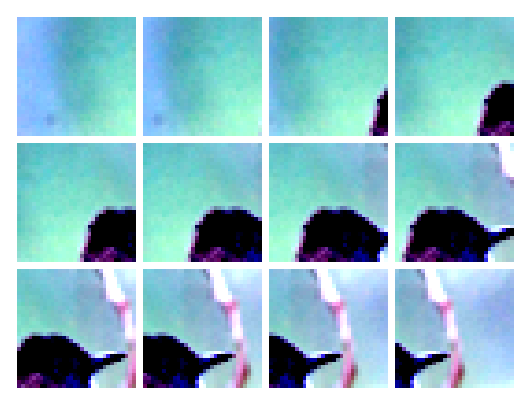

In [213]:
img_grid = torchvision.utils.make_grid(cropped_imgs,nrow=4,pad_value=1).permute(1,2,0)
plt.figure(figsize=(10,5))
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()

/tmp/ipykernel_2873023/3763022278.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])


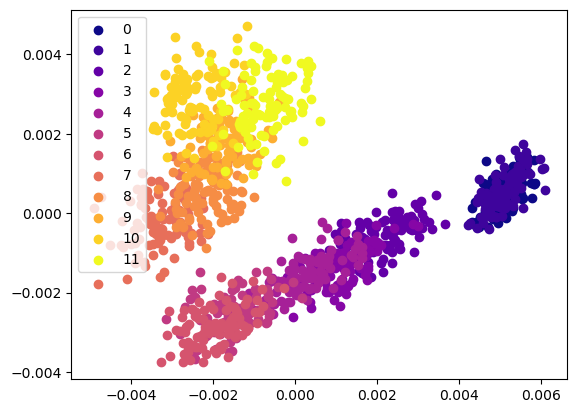

In [228]:
pcs = PCA(n_components=2).fit(activations.cpu())
proj = pcs.transform(activations.cpu())
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0,1,n_crops))
for n,i in enumerate(range(0,n_draws*n_crops,n_draws)):
    plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])
    plt.legend()

/tmp/ipykernel_2873023/3763022278.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])


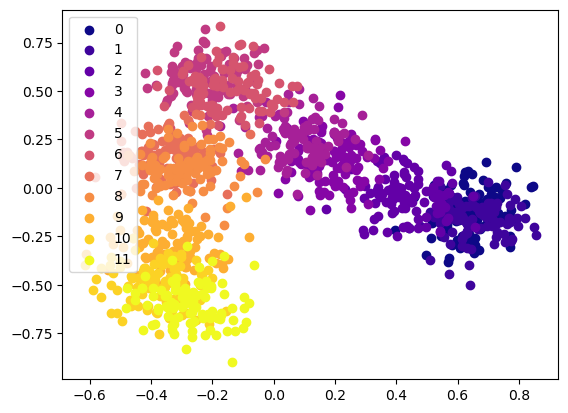

In [219]:
pcs = PCA(n_components=2).fit(activations.cpu())
proj = pcs.transform(activations.cpu())
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0,1,n_crops))
for n,i in enumerate(range(0,n_draws*n_crops,n_draws)):
    plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])
    plt.legend()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..2.465708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.2281874..1.193377].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.2281874..1.0713727].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.177871..1.0455183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.265406..1.0455183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.405462..1.0455183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..1.04

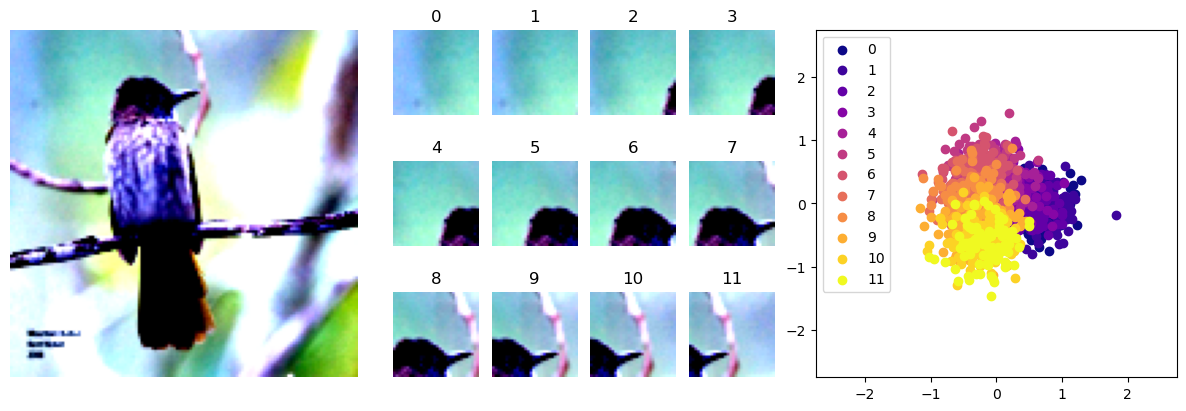

In [207]:
fig = plt.figure(layout="constrained", figsize=(12,4))
axs = fig.subplot_mosaic(
    """
    ABCDEN
    AFGHIN
    AJKLMN
    """,
    width_ratios=[1.1,0.25,0.25,0.25,0.25,1]
)
axs['A'].imshow(img.permute(1,2,0))
axs['A'].axis('off')
for i,a in enumerate(['B','C','D','E','F','G','H','I','J','K','L','M']):
    axs[a].imshow(cropped_imgs[i].permute(1,2,0))
    axs[a].axis('off')
    axs[a].set_title(str(i))
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0,1,n_crops))
for n,i in enumerate(range(0,n_draws*n_crops,n_draws)):
    axs['N'].scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])
axs['N'].legend()
axs['N'].set(xlim=(-2.75,2.75),ylim=(-2.75,2.75))
fig.savefig(model_str+".pdf")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..2.465708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..1.9951199].
/tmp/ipykernel_2873023/4126917632.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs[2].scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])


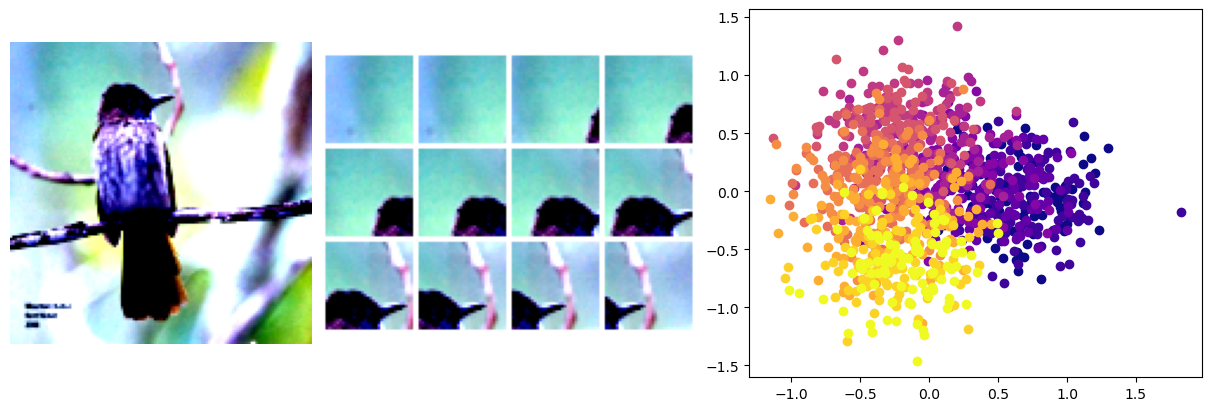

In [208]:
fig,axs = plt.subplots(1,3,layout="constrained", figsize=(12,4), width_ratios=[1,1.25,1.5])
axs[0].imshow(img.permute(1,2,0))
axs[0].axis('off')
img_grid = torchvision.utils.make_grid(cropped_imgs,nrow=4,pad_value=1).permute(1,2,0)
axs[1].imshow(img_grid)
axs[1].axis('off')
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0,1,n_crops))
for n,i in enumerate(range(0,n_draws*n_crops,n_draws)):
    axs[2].scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])